In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def download_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

In [8]:
def calculate_daily_returns(data):
    return data.pct_change().dropna()

In [9]:
def calculate_annual_returns(daily_returns):
    return daily_returns.mean() * 252

In [10]:
def calculate_annual_volatility(daily_returns):
    return daily_returns.std() * np.sqrt(252)

In [11]:
def calculate_sharpe_ratio(returns, risk_free_rate=0.0):
    sharpe_ratio = (returns - risk_free_rate) / np.sqrt(252)
    return sharpe_ratio

In [12]:
def generate_random_weights(num_assets):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    return weights

In [13]:
def calculate_portfolio_return(weights, returns):
    return np.sum(weights * returns)

In [14]:
def calculate_portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

In [15]:
def simulate_portfolios(returns, cov_matrix, num_portfolios=5000):
    results = np.zeros((3, num_portfolios))
    for i in range(num_portfolios):
        weights = generate_random_weights(len(returns))
        portfolio_return = calculate_portfolio_return(weights, returns)
        portfolio_volatility = calculate_portfolio_volatility(weights, cov_matrix)
        sharpe_ratio = portfolio_return / portfolio_volatility
        results[0, i] = portfolio_return
        results[1, i] = portfolio_volatility
        results[2, i] = sharpe_ratio
    return results

In [16]:
def plot_efficient_frontier(returns, cov_matrix, num_portfolios=5000):
    results = simulate_portfolios(returns, cov_matrix, num_portfolios)
    max_sharpe_idx = np.argmax(results[2])
    max_sharpe_return = results[0, max_sharpe_idx]
    max_sharpe_volatility = results[1, max_sharpe_idx]
    plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis')
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(max_sharpe_volatility, max_sharpe_return, marker='*', color='r', s=200, label='Max Sharpe Ratio Portfolio')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.title('Efficient Frontier')
    plt.legend()
    plt.show()

[*********************100%***********************]  5 of 5 completed


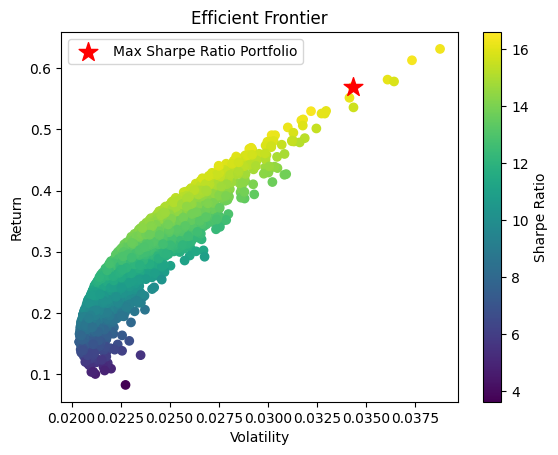

In [17]:
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
start_date = '2020-01-01'
end_date = '2023-01-01'
data = download_data(tickers, start_date, end_date)

daily_returns = calculate_daily_returns(data)

annual_returns = calculate_annual_returns(daily_returns)
cov_matrix = daily_returns.cov()
sharpe_ratios = calculate_sharpe_ratio(annual_returns)

plot_efficient_frontier(annual_returns, cov_matrix)